In [1]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.2 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.

In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
data_set = "/kaggle/input/kannada-emo-speech-dataset/"
# Run one example
dir_list = os.listdir(data_set)
dir_list[:5]

['12-06-01.wav',
 '13-06-02.wav',
 '13-04-02.wav',
 '07-01-02.wav',
 '12-05-04.wav']

In [10]:
emotion_map={
    1: "Anger",
    2: "Sadness",
    3: "Surprise",
    4: "Happiness",
    5: "Fear",
    6: "Neutral"
}

# Initialize a list to store rows of the DataFrame
data = []

# Loop through each directory and each file within the directory
for directory in dir_list:
    val = directory.split('.')[0].split('-')[1]
    if int(val) == 3:
        continue
    file_path = os.path.join(data_set, directory)
    emotion = emotion_map[int(val)]
    data.append([emotion, file_path])            


# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [11]:
df.head(5)

,emotion,path
0,Neutral,/kaggle/input/kannada-emo-speech-dataset/12-06...
1,Neutral,/kaggle/input/kannada-emo-speech-dataset/13-06...
2,Happiness,/kaggle/input/kannada-emo-speech-dataset/13-04...
3,Anger,/kaggle/input/kannada-emo-speech-dataset/07-01...
4,Fear,/kaggle/input/kannada-emo-speech-dataset/12-05...


In [12]:
ref = df
ref.head(10)

,emotion,path
0,Neutral,/kaggle/input/kannada-emo-speech-dataset/12-06...
1,Neutral,/kaggle/input/kannada-emo-speech-dataset/13-06...
2,Happiness,/kaggle/input/kannada-emo-speech-dataset/13-04...
3,Anger,/kaggle/input/kannada-emo-speech-dataset/07-01...
4,Fear,/kaggle/input/kannada-emo-speech-dataset/12-05...
5,Fear,/kaggle/input/kannada-emo-speech-dataset/02-05...
6,Sadness,/kaggle/input/kannada-emo-speech-dataset/09-02...
7,Fear,/kaggle/input/kannada-emo-speech-dataset/04-05...
8,Happiness,/kaggle/input/kannada-emo-speech-dataset/11-04...
9,Sadness,/kaggle/input/kannada-emo-speech-dataset/05-02...


In [13]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
101,Anger,/kaggle/input/kannada-emo-speech-dataset/06-01-05.wav
30,Fear,/kaggle/input/kannada-emo-speech-dataset/07-05-04.wav
231,Anger,/kaggle/input/kannada-emo-speech-dataset/05-01-06.wav
80,Neutral,/kaggle/input/kannada-emo-speech-dataset/11-06-06.wav
254,Neutral,/kaggle/input/kannada-emo-speech-dataset/01-06-06.wav
...,...,...
62,Neutral,/kaggle/input/kannada-emo-speech-dataset/03-06-03.wav
120,Neutral,/kaggle/input/kannada-emo-speech-dataset/07-06-03.wav
220,Sadness,/kaggle/input/kannada-emo-speech-dataset/05-02-03.wav
300,Sadness,/kaggle/input/kannada-emo-speech-dataset/03-02-03.wav


<Axes: ylabel='count'>

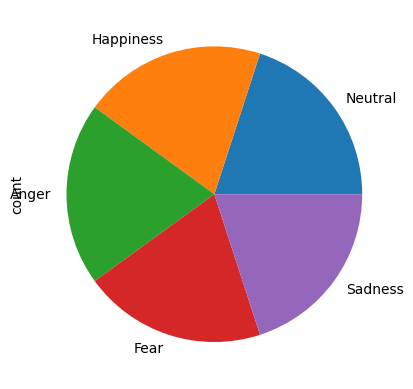

In [14]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [15]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.1 MB/s eta 0:00:0000:0100:01


In [16]:
import resampy
from resampy import resample
import librosa

In [17]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

390


,Features
0,"[-0.12370042502880096, -1.8613669872283936, -5.572726249694824, -4.584867000579834, -4.451449394226074, -3.8694279193878174, -3.975733518600464, -3.3425326347351074, -3.544767379760742, -4.9341630935668945, -4.664918422698975, -6.192603588104248, -7.677194118499756, -10.054738998413086, -13.720428466796875, -17.52062225341797, -19.564228057861328, -20.35788917541504, -22.528942108154297, -20.21306610107422, -18.407827377319336, -17.334251403808594, -16.480300903320312, -15.188554763793945, -12.416231155395508, -8.585420608520508, 0.07748923450708389, 3.2615528106689453, 3.7347140312194824, 0.9966171383857727, -1.8504829406738281, -1.5317260026931763, -2.228501319885254, -4.666153907775879, -6.809553623199463, -8.433491706848145, -7.741995811462402, -6.151763916015625, -6.278759956359863, -4.710080623626709, -2.686721086502075, -1.767890214920044, -2.7342429161071777, -4.564599514007568, -5.046817779541016, -7.841279029846191, -10.360368728637695, -10.933417320251465, -11.332830429077148, -10.535386085510254, -10.730963706970215, -9.440179824829102, -5.77301549911499, 0.7387998700141907, 4.724534034729004, 5.112448692321777, 3.46431040763855, 0.2967450022697449, -0.7362316250801086, -1.4479496479034424, -2.7143349647521973, -2.7808732986450195, -2.0998477935791016, -2.107933521270752, 0.37186843156814575, 0.3574587404727936, -1.7291030883789062, -3.099024534225464, -4.3233113288879395, -3.077064275741577, -2.815807342529297, -1.8749927282333374, -2.113988161087036, -2.3744096755981445, -2.8211276531219482, -3.1209208965301514, -3.3312981128692627, -3.7762508392333984, -3.814830780029297, -3.202301502227783, -4.2275567054748535, -5.131282806396484, -5.853206157684326, -6.0171709060668945, -4.661266803741455, -5.35876989364624, -3.7007153034210205, -2.931061267852783, -2.6900415420532227, -3.8487772941589355, -4.706691741943359, -5.264385223388672, -6.976661682128906, -8.843128204345703, -6.761064052581787, -3.6830246448516846, -1.7322918176651, -3.2417216300964355, -7.1367506980896, -8.74918270111084, ...]"
1,"[-2.912996768951416, -3.282270908355713, -3.4362316131591797, -3.1927056312561035, -2.155878782272339, -2.3434321880340576, -3.255453109741211, -4.081703186035156, -4.674179553985596, -4.227257251739502, -3.992405652999878, -4.525224208831787, -5.393487453460693, -5.417746543884277, -8.416847229003906, -10.453447341918945, -11.12060260772705, -12.069483757019043, -4.8573503494262695, -1.4027835130691528, -0.14535674452781677, 1.0367844104766846, 0.8477374911308289, -1.2034322023391724, 0.4372963011264801, 1.7202686071395874, 0.768960177898407, -1.163254737854004, -2.9611289501190186, -2.0738682746887207, -2.072127103805542, -4.080101490020752, -5.176640033721924, -6.881732940673828, -5.635560035705566, -4.31859016418457, -4.750527858734131, -4.755124568939209, -5.422736167907715, -6.019075870513916, -6.551764011383057, -7.201435089111328, -6.4456305503845215, -6.191040992736816, -5.765341281890869, -4.586161136627197, -4.203312873840332, -3.4041199684143066, -3.000633716583252, -3.2095935344696045, -3.077146053314209, -4.405339241027832, -5.981478691101074, -4.999273777008057, -4.01431131362915, -4.30782413482666, -6.428509712219238, -5.0004496574401855, -5.015149116516113, -4.667874813079834, -5.223537921905518, -6.471418857574463, -6.793956756591797, -8.115438461303711, -10.130024909973145, -11.069215774536133, -9.685873031616211, -9.27904987335205, -10.9705171585083, -10.030805587768555, -8.37694263458252, -7.7708868980407715, -6.76769495010376, -5.354033946990967, -4.991000175476074, -5.735595703125, -5.407456398010254, -4.858611106872559, -5.0790910720825195, -5.3421807289123535, -4.831609725952148, -3.1930198669433594, -2.938211441040039, -2.9916322231292725, -2.327177047729492, -2.9085752964019775, -3.8587474822998047, -4.89376163482666, -3.886693239212036, -4.107836723327637, -5.043573379516602, -5.82112979888916, -6.067342281341553, -7.518060207366943, -8.242727279663086, -8.301514625549316, -5.266492

In [18]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Neutral,/kaggle/input/kannada-emo-speech-dataset/12-06-01.wav,-0.123700,-1.861367,-5.572726,-4.584867,-4.451449,-3.869428,-3.975734,-3.342533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,/kaggle/input/kannada-emo-speech-dataset/13-06-02.wav,-2.912997,-3.282271,-3.436232,-3.192706,-2.155879,-2.343432,-3.255453,-4.081703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Happiness,/kaggle/input/kannada-emo-speech-dataset/13-04-02.wav,-2.103069,-3.351439,-4.835007,-5.181194,-6.825647,-6.964139,-4.401143,-4.299482,...,0.597670,0.522250,0.506227,0.497288,0.502904,0.497644,0.510003,0.608821,0.698333,0.104150
3,Anger,/kaggle/input/kannada-emo-speech-dataset/07-01-02.wav,-30.430729,-30.509007,-30.881012,-30.729471,-30.622335,-30.266272,-30.278950,-30.221930,...,0.495297,0.337074,0.302632,0.289976,0.311714,0.352858,0.350002,0.385149,0.481655,0.069024
4,Fear,/kaggle/input/kannada-emo-speech-dataset/12-05-04.wav,-21.978943,-21.284754,-19.799202,-18.290787,-15.124433,-10.084684,-8.406710,-7.925078,...,0.606850,0.599666,0.581856,0.553210,0.579444,0.661404,0.724610,0.700063,0.699126,0.040553


In [19]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(390, 533)


,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Neutral,/kaggle/input/kannada-emo-speech-dataset/12-06-01.wav,-0.123700,-1.861367,-5.572726,-4.584867,-4.451449,-3.869428,-3.975734,-3.342533,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Neutral,/kaggle/input/kannada-emo-speech-dataset/13-06-02.wav,-2.912997,-3.282271,-3.436232,-3.192706,-2.155879,-2.343432,-3.255453,-4.081703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Happiness,/kaggle/input/kannada-emo-speech-dataset/13-04-02.wav,-2.103069,-3.351439,-4.835007,-5.181194,-6.825647,-6.964139,-4.401143,-4.299482,...,0.597670,0.522250,0.506227,0.497288,0.502904,0.497644,0.510003,0.608821,0.698333,0.104150
3,Anger,/kaggle/input/kannada-emo-speech-dataset/07-01-02.wav,-30.430729,-30.509007,-30.881012,-30.729471,-30.622335,-30.266272,-30.278950,-30.221930,...,0.495297,0.337074,0.302632,0.289976,0.311714,0.352858,0.350002,0.385149,0.481655,0.069024
4,Fear,/kaggle/input/kannada-emo-speech-dataset/12-05-04.wav,-21.978943,-21.284754,-19.799202,-18.290787,-15.124433,-10.084684,-8.406710,-7.925078,...,0.606850,0.599666,0.581856,0.553210,0.579444,0.661404,0.724610,0.700063,0.699126,0.040553


In [20]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
224,0.557853,2.354570,2.248599,2.494645,3.435787,4.408431,3.755138,1.799323,1.047579,-0.130880,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
234,-8.789890,-7.381186,-9.411219,-9.471548,-8.207224,-8.599302,-8.472666,-9.682737,-11.915595,-12.844557,...,0.437706,0.412841,0.407696,0.407342,0.423765,0.446436,0.507608,0.552922,0.547591,0.115343
307,-22.909578,-22.909578,-22.909578,-22.909578,-22.909578,-22.909578,-22.909578,-22.909578,-22.909578,-22.909578,...,0.755869,0.695608,0.658093,0.630122,0.626435,0.600727,0.594914,0.604574,0.596921,0.247672
335,-1.284055,-3.796654,-7.551044,-7.512157,-8.910058,-8.217344,-8.693998,-9.870681,-8.611362,-10.234976,...,0.487342,0.543789,0.510287,0.469439,0.488819,0.533991,0.566016,0.579764,0.597494,0.099122
127,-31.164022,-31.164022,-31.164022,-31.164022,-31.164022,-31.164022,-31.164022,-31.164022,-31.164022,-31.164022,...,0.672877,0.679947,0.649159,0.665573,0.687871,0.694229,0.688752,0.703585,0.708684,0.051596
74,0.420758,0.228259,-1.924339,-1.970866,-4.200762,-6.517569,-7.029527,-7.563265,-8.270588,-7.985857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
314,-17.173038,-18.962688,-19.184757,-19.085897,-20.570848,-22.066698,-22.563931,-22.848967,-23.176964,-25.943970,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29,-15.943323,-16.282681,-18.064510,-16.292566,-16.277620,-14.620824,-13.441469,-13.651546,-13.700792,-13.764708,...,0.482913,0.500904,0.519749,0.605780,0.665987,0.599720,0.531141,0.439704,0.387381,0.030556
83,-33.821556,-32.429512,-32.949104,-32.273067,-32.043724,-31.221909,-31.277714,-31.409262,-32.349270,-32.827023,...,0.485336,0.572168,0.728199,0.709903,0.631224,0.587534,0.532235,0.416523,0.380552,0.006198
322,-34.836895,-34.836895,-34.836895,-34.836895,-34.836895,-34.836895,-34.836895,-34.836895,-34.836895,-34.836895,...,0.592712,0.666492,0.653663,0.630998,0.696316,0.723712,0.724378,0.641704,0.576710,0.021608


In [21]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
(312, 531, 1)
(78, 531, 1)


In [22]:
lb.classes_

array(['Anger', 'Fear', 'Happiness', 'Neutral', 'Sadness'], dtype=object)

In [23]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

390


,mel_spectrogram
0,"[-11.550412, -13.583106, -18.224693, -21.055918, -24.415218, -27.721973, -29.589506, -30.209, -32.58517, -36.19978, -38.03276, -38.550808, -39.818806, -42.739063, -43.959816, -45.1872, -45.739258, -45.347214, -44.759304, -44.137596, -39.168186, -31.92489, -26.457592, -21.917965, -17.85171, -17.078362, -15.13615, -11.693167, -9.426213, -9.776445, -11.176865, -13.248126, -19.505705, -30.531609, -36.089275, -37.976715, -23.148014, -15.481903, -15.502382, -14.954821, -10.079306, -8.032882, -8.46323, -11.51733, -17.431818, -28.347681, -33.50837, -34.73296, -36.00173, -23.428473, -15.821036, -14.782328, -11.632046, -3.0712047, -0.64921355, -3.943814, -8.347575, -11.294092, -12.123977, -12.005918, -11.3211155, -11.787022, -12.008911, -11.922281, -13.042168, -16.45271, -19.933014, -20.12397, -18.369774, -15.988492, -15.085313, -14.590563, -15.563392, -16.64454, -17.787455, -18.68327, -19.192255, -19.557579, -18.683907, -18.426102, -19.989227, -22.4528, -24.918009, -28.213652, -20.232101, -16.655493, -16.059206, -13.717379, -12.2201805, -11.8912945, -11.713181, -12.721888, -14.953742, -18.191683, -21.218334, -24.801334, -29.194977, -33.628815, -36.68339, -39.324154, ...]"
1,"[-20.771013, -19.322397, -18.555765, -18.306658, -17.631607, -17.103855, -18.10786, -18.56868, -18.079386, -18.210402, -20.22999, -24.588242, -29.439577, -31.958061, -32.58169, -32.916626, -27.425566, -17.128407, -8.82105, -7.5081997, -9.396385, -7.362454, -5.6017966, -4.7112494, -2.7627993, -1.8186368, -2.2711022, -4.089523, -5.238103, -7.008949, -11.835068, -16.082167, -12.152506, -9.728882, -9.599622, -9.732974, -10.589428, -12.967072, -18.83798, -22.7464, -23.138336, -22.74585, -21.878874, -21.749836, -22.631992, -22.52212, -14.878377, -11.28424, -11.061463, -12.557329, -15.065725, -20.038355, -21.461475, -19.449032, -19.743608, -19.439281, -18.539387, -17.680372, -16.584385, -15.282258, -16.137394, -16.299564, -14.937881, -15.146001, -18.285727, -21.825104, -23.304424, -24.428068, -24.56598, -23.91487, -22.037542, -20.72954, -20.446217, -20.693827, -22.57535, -24.507692, -23.896687, -23.613909, -21.950779, -19.634396, -17.305902, -15.773627, -14.205203, -12.87348, -12.24707, -13.441066, -19.350956, -19.137352, -16.38389, -15.048057, -14.2180395, -14.333805, -17.024446, -22.261042, -24.437637, -15.976754, -12.187992, -14.379833, -18.124979, -23.942585, ...]"
2,"[-11.234513, -9.615183, -10.588127, -11.198911, -12.55945, -14.158273, -15.2375555, -18.263636, -21.279648, -23.561954, -28.06025, -31.183449, -32.53922, -33.311584, -32.978783, -27.652538, -22.531872, -21.264055, -20.623075, -19.273445, -18.947996, -18.937586, -19.448978, -20.652376, -20.86911, -20.902304, -21.246866, -21.222383, -22.291874, -24.574404, -29.83607, -33.626698, -33.5513, -34.502502, -33.53063, -33.045334, -33.38508, -31.784779, -15.946938, -5.7116766, -3.0948567, -5.6975565, -6.0793943, -4.395055, -4.978777, -6.507496, -7.4790354, -9.05892, -11.127763, -11.718225, -11.470718, -12.256885, -11.992127, -12.457281, -11.580927, -10.773319, -10.837613, -12.141851, -16.042253, -23.24463, -25.598967, -20.0025, -16.133728, -14.9370165, -15.679403, -19.14396, -22.723495, -24.93123, -26.091661, -26.404125, -25.783873, -25.378508, -24.930643, -24.180471, -24.525145, -25.21181, -25.066507, -25.70674, -18.018137, -12.960855, -12.055131, -12.942768, -14.333783, -15.001218, -15.323065, -19.103653, -17.81861, -15.104039, -16.838402, -16.145185, -15.302262, -15.136817, -17.91085, -21.11263, -23.05515, -24.329079, -22.474743, -21.343817, -20.30352, -17.818323, ...]"
3,"[-52.962948, -52.920525, -52.816704, -52.81624, -52.7585, -52.88115, -52.7722, -52.769093, -52.880356, -52.79484, -52.58764, -52.619316, -52.815163, -52.88746, -52.635593, -52.723026, -52.868927, -52.961258, -52.947502, -52.751965, -52.637722, -52.788975, -52.036602, -43.095116, -34.49664, -29.17558, -28.902716, -30.332304, -30.15254, -30.582006, -31.664112, -32.236107, -33.00318, -34.777584, -36.080177, -36.406876, -36.30

In [24]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Neutral,/kaggle/input/kannada-emo-speech-dataset/12-06-01.wav,-11.550412,-13.583106,-18.224693,-21.055918,-24.415218,-27.721973,-29.589506,-30.209000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,/kaggle/input/kannada-emo-speech-dataset/13-06-02.wav,-20.771013,-19.322397,-18.555765,-18.306658,-17.631607,-17.103855,-18.107861,-18.568680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Happiness,/kaggle/input/kannada-emo-speech-dataset/13-04-02.wav,-11.234513,-9.615183,-10.588127,-11.198911,-12.559450,-14.158273,-15.237556,-18.263636,...,-17.537943,-16.908098,-16.699287,-16.538729,-15.156887,-10.925637,-10.012328,-12.926545,-14.463162,-11.565546
3,Anger,/kaggle/input/kannada-emo-speech-dataset/07-01-02.wav,-52.962948,-52.920525,-52.816704,-52.816238,-52.758499,-52.881149,-52.772202,-52.769093,...,-16.622871,-20.126125,-23.293747,-25.429399,-28.808641,-34.103924,-29.047573,-24.625797,-22.653563,-18.982737
4,Fear,/kaggle/input/kannada-emo-speech-dataset/12-05-04.wav,-44.395367,-39.964912,-36.081882,-33.128716,-30.994959,-28.111862,-25.682613,-25.225613,...,-21.410299,-20.578043,-21.304890,-22.442408,-25.344519,-30.909618,-36.335960,-39.505482,-36.789944,-28.218838


In [25]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
224,-10.856394,-9.035934,-9.751777,-8.610207,-8.035536,-8.482947,-7.896334,-6.896660,-6.289960,-5.943488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,-6.996682,-7.041254,-9.374983,-8.998652,-7.707294,-7.002649,-7.047874,-7.327389,-9.478836,-12.972730,...,-24.509426,-26.332634,-25.288792,-19.749256,-15.812348,-13.596134,-12.495052,-12.221489,-11.480831,-9.965371
307,-39.612293,-39.612293,-39.612293,-39.612293,-39.612293,-39.612293,-39.612293,-39.612293,-39.612293,-39.612293,...,6.601692,5.432881,3.968408,0.104737,-8.068243,-7.251465,-6.800458,-6.283113,-2.776904,-0.833206
335,-8.987275,-11.547790,-16.091736,-16.501736,-16.826216,-17.515310,-18.766529,-19.445580,-19.689852,-19.820692,...,-21.456755,-21.411173,-21.980785,-22.956806,-24.540255,-24.389349,-22.965948,-12.123829,-6.672858,-5.800656
127,-55.420517,-55.420517,-55.420517,-55.420517,-55.420517,-55.420517,-55.420517,-55.420517,-55.420517,-55.420517,...,-55.301060,-55.382885,-55.403625,-55.412716,-55.391273,-50.728825,-45.673790,-45.764042,-50.832291,-55.300957
74,-15.819094,-14.102078,-12.758802,-14.293894,-19.591612,-22.944914,-24.014997,-24.226646,-24.059021,-24.514839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,-30.408463,-25.563353,-24.661179,-26.421928,-26.896273,-27.707354,-28.063221,-28.676126,-29.087046,-30.104908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,-46.024090,-42.485863,-41.303204,-41.477661,-42.117588,-42.108318,-42.411480,-42.782322,-42.850163,-42.862404,...,-28.386795,-28.209246,-30.878754,-31.928591,-32.000652,-32.815582,-35.465504,-37.467838,-36.628735,-32.919487
83,-67.706024,-65.785965,-65.428764,-65.272690,-64.802734,-65.043701,-64.976189,-64.867188,-64.572319,-64.393013,...,-42.578995,-41.228275,-40.962654,-41.114807,-41.474453,-41.922119,-44.099243,-47.450623,-50.244194,-47.607052
322,-61.485256,-61.485256,-61.485256,-61.485256,-61.485256,-61.485256,-61.485256,-61.485256,-61.485256,-61.485256,...,-36.908291,-39.875668,-39.703293,-33.956783,-31.281088,-31.725012,-31.857864,-32.550579,-30.548372,-24.835438


In [26]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
(312, 259, 1)
(78, 259, 1)


In [27]:
data_path = pd.concat([df], axis = 0)
# data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Neutral,/kaggle/input/kannada-emo-speech-dataset/12-06-01.wav,-11.550412,-13.583106,-18.224693,-21.055918,-24.415218,-27.721973,-29.589506,-30.209000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,/kaggle/input/kannada-emo-speech-dataset/13-06-02.wav,-20.771013,-19.322397,-18.555765,-18.306658,-17.631607,-17.103855,-18.107861,-18.568680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Happiness,/kaggle/input/kannada-emo-speech-dataset/13-04-02.wav,-11.234513,-9.615183,-10.588127,-11.198911,-12.559450,-14.158273,-15.237556,-18.263636,...,-17.537943,-16.908098,-16.699287,-16.538729,-15.156887,-10.925637,-10.012328,-12.926545,-14.463162,-11.565546
3,Anger,/kaggle/input/kannada-emo-speech-dataset/07-01-02.wav,-52.962948,-52.920525,-52.816704,-52.816238,-52.758499,-52.881149,-52.772202,-52.769093,...,-16.622871,-20.126125,-23.293747,-25.429399,-28.808641,-34.103924,-29.047573,-24.625797,-22.653563,-18.982737
4,Fear,/kaggle/input/kannada-emo-speech-dataset/12-05-04.wav,-44.395367,-39.964912,-36.081882,-33.128716,-30.994959,-28.111862,-25.682613,-25.225613,...,-21.410299,-20.578043,-21.304890,-22.442408,-25.344519,-30.909618,-36.335960,-39.505482,-36.789944,-28.218838


ValueError: could not convert string to float: 'Neutral'

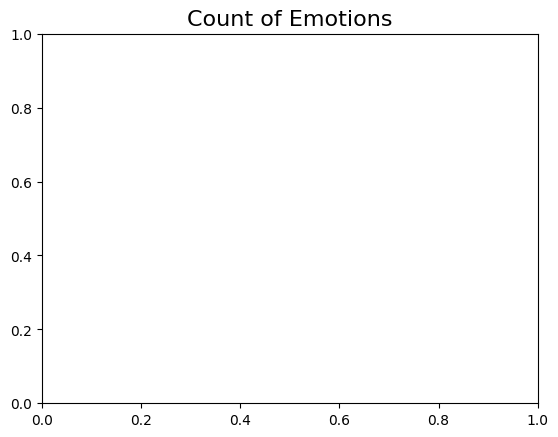

In [28]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [30]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [31]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [32]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [33]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [34]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [35]:
len(X), len(Y), data_path.path.shape

(1170, 1170, (390,))

In [36]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.068888,0.621854,0.607963,0.639401,0.548103,0.501810,0.550885,0.607687,0.668563,0.677193,...,0.004135,0.001837,0.001101,0.001101,0.000777,0.000636,7.452141e-04,4.508809e-04,4.570436e-05,Neutral
1,0.288005,0.771214,0.767386,0.766341,0.738817,0.737471,0.699458,0.708920,0.764142,0.756399,...,0.077948,0.075225,0.076186,0.073630,0.075513,0.074293,7.576884e-02,7.690289e-02,7.607260e-02,Neutral
2,0.067596,0.692155,0.598280,0.597643,0.664893,0.559476,0.456329,0.509576,0.594076,0.622690,...,0.002016,0.001211,0.000654,0.000246,0.000250,0.000159,2.209381e-04,7.860567e-05,7.570214e-06,Neutral
3,0.041016,0.570132,0.528095,0.522859,0.576891,0.622940,0.601258,0.544918,0.560473,0.625489,...,0.000012,0.000008,0.000006,0.000004,0.000002,0.000001,6.326631e-07,3.625526e-07,1.191686e-07,Neutral
4,0.107038,0.616075,0.608306,0.575391,0.575706,0.626378,0.663295,0.613949,0.566270,0.588100,...,0.003553,0.003678,0.003538,0.003777,0.003696,0.003818,3.641035e-03,3.763645e-03,3.744771e-03,Neutral


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(936, 155, 1)
(234, 155, 1)


(1170, 5)

In [38]:
lb.classes_

array(['Anger', 'Fear', 'Happiness', 'Neutral', 'Sadness'], dtype=object)

In [39]:
#Accuarte class labels

In [40]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Neutral,/kaggle/input/kannada-emo-speech-dataset/12-06-01.wav,-11.550412,-13.583106,-18.224693,-21.055918,-24.415218,-27.721973,-29.589506,-30.209000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,/kaggle/input/kannada-emo-speech-dataset/13-06-02.wav,-20.771013,-19.322397,-18.555765,-18.306658,-17.631607,-17.103855,-18.107861,-18.568680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Happiness,/kaggle/input/kannada-emo-speech-dataset/13-04-02.wav,-11.234513,-9.615183,-10.588127,-11.198911,-12.559450,-14.158273,-15.237556,-18.263636,...,-17.537943,-16.908098,-16.699287,-16.538729,-15.156887,-10.925637,-10.012328,-12.926545,-14.463162,-11.565546
3,Anger,/kaggle/input/kannada-emo-speech-dataset/07-01-02.wav,-52.962948,-52.920525,-52.816704,-52.816238,-52.758499,-52.881149,-52.772202,-52.769093,...,-16.622871,-20.126125,-23.293747,-25.429399,-28.808641,-34.103924,-29.047573,-24.625797,-22.653563,-18.982737
4,Fear,/kaggle/input/kannada-emo-speech-dataset/12-05-04.wav,-44.395367,-39.964912,-36.081882,-33.128716,-30.994959,-28.111862,-25.682613,-25.225613,...,-21.410299,-20.578043,-21.304890,-22.442408,-25.344519,-30.909618,-36.335960,-39.505482,-36.789944,-28.218838
5,Fear,/kaggle/input/kannada-emo-speech-dataset/02-05-06.wav,-28.654943,-29.052658,-31.817953,-33.131962,-34.516300,-36.168976,-37.609360,-36.341919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sadness,/kaggle/input/kannada-emo-speech-dataset/09-02-05.wav,-53.106281,-50.613625,-48.621586,-44.779888,-43.896122,-43.792522,-43.322063,-43.381119,...,-36.561722,-34.929554,-34.701462,-33.926601,-33.349895,-33.782902,-34.188168,-34.007145,-33.770454,-31.233290
7,Fear,/kaggle/input/kannada-emo-speech-dataset/04-05-06.wav,-52.183254,-52.183254,-52.183254,-52.183254,-52.183254,-52.183254,-52.183254,-52.183254,...,-34.973209,-31.780113,-30.454382,-29.945728,-27.718840,-27.721542,-27.821194,-27.728966,-21.670622,-15.950703
8,Happiness,/kaggle/input/kannada-emo-speech-dataset/11-04-03.wav,-22.921597,-21.421017,-20.954136,-20.102226,-19.704905,-19.493021,-19.023525,-18.966557,...,-33.162235,-36.844910,-37.576931,-37.779228,-36.864712,-37.476757,-38.417633,-39.840294,-41.527893,-39.730244
9,Sadness,/kaggle/input/kannada-emo-speech-dataset/05-02-06.wav,-36.614361,-30.908180,-32.254486,-33.974216,-33.214859,-32.888317,-32.269035,-31.611113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: could not convert string to float: 'Neutral'

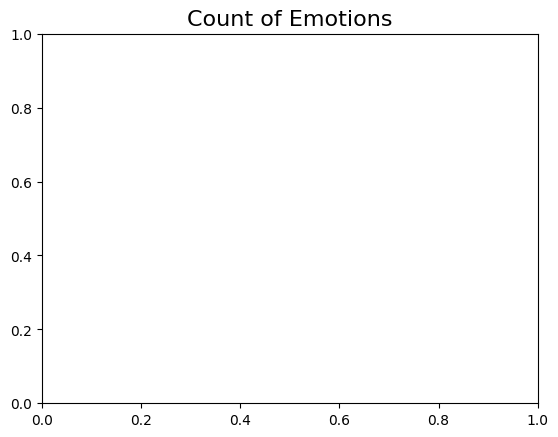

In [41]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [42]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [43]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [44]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [45]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [46]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [47]:
len(X), len(Y), data_path.path.shape

(1560, 1560, (390,))

In [48]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.068888,0.621854,0.607963,0.639401,0.548103,0.501810,0.550885,0.607687,0.668563,0.677193,...,0.004135,0.001837,0.001101,0.001101,0.000777,0.000636,7.452141e-04,4.508809e-04,4.570436e-05,Neutral
1,0.127428,0.670115,0.644515,0.663466,0.609264,0.550137,0.571254,0.614266,0.677300,0.687567,...,0.004145,0.001889,0.001151,0.001156,0.000833,0.000696,8.165878e-04,5.039778e-04,1.008476e-04,Neutral
2,0.067596,0.692155,0.598280,0.597643,0.664893,0.559476,0.456329,0.509576,0.594076,0.622690,...,0.002016,0.001211,0.000654,0.000246,0.000250,0.000159,2.209381e-04,7.860567e-05,7.570214e-06,Neutral
3,0.066884,0.679319,0.600150,0.608940,0.686336,0.578434,0.470889,0.497813,0.566784,0.641291,...,0.002289,0.001179,0.000540,0.000272,0.000245,0.000176,1.929767e-04,1.073220e-04,1.005485e-05,Neutral
4,0.041016,0.570132,0.528095,0.522859,0.576891,0.622940,0.601258,0.544918,0.560473,0.625489,...,0.000012,0.000008,0.000006,0.000004,0.000002,0.000001,6.326631e-07,3.625526e-07,1.191686e-07,Neutral


In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]
(1248, 155, 1)
(312, 155, 1)


(1560, 5)

In [50]:
lb.classes_

array(['Anger', 'Fear', 'Happiness', 'Neutral', 'Sadness'], dtype=object)

In [51]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/kaggle/input/german-model/german_models/model1-emo-db.weights.h5')
model2 = load_model('/kaggle/input/german-model/german_models/model2-emo-db.weights.h5')
model3 = load_model('/kaggle/input/german-model/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db-model-2.png')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Accuracy Score for model1 =  0.13141025641025642
Accuracy Score for model2 =  0.16025641025641027
Accuracy Score for model3 =  0.1858974358974359
Accuracy Score for average ensemble =  0.15705128205128205
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Weighted average method
Accuracy Score for model1 =  0.13141025641025642
Accuracy Score for model2 =  0.16025641025641027
Accuracy Score for model3 =  0.1858974358974359
Accuracy Score for average ensemble =  0.15705128205128205
Accuracy Score for weighted average ensemble =  0.15384615384615385
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Max accuracy of

ValueError: Shape of passed values is (7, 7), indices imply (5, 5)

In [ ]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('SAVEE-EMSEMBLE.png')
plt.show()